# alpha vantage data exploration

In [10]:
from alpha_vantage.timeseries import TimeSeries as TimeSeriesOg
from alpha_vantage.async_support.timeseries import TimeSeries
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
#import nest_asyncio
import datetime as dt
import pandas as pd
import numpy as np
import asyncio
import os

api_key = "HXRGE747RBD2KVJ2"
print('imported modules.')

imported modules.


## read in nasdaq .csv

In [2]:
nasdaq = pd.read_csv('nasdaq_screener.csv')
nasdaq.head()

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$133.28,1.31,0.993%,4.061008e+10,United States,1999.0,2121339,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$32.84,-0.55,-1.647%,6.118788e+09,NaN,2016.0,6018047,Basic Industries,Aluminum
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$9.87,-0.03,-0.303%,1.233873e+09,NaN,2021.0,251428,Finance,Business Services
3,AACG,ATA Creativity Global American Depositary Shares,$3.09,-0.28,-8.309%,9.687305e+07,China,NaN,1646131,Consumer Services,Other Consumer Services
4,AACQ,Artius Acquisition Inc. Class A Common Stock,$10.04,-0.12,-1.181%,9.092475e+08,United States,2020.0,1312002,Basic Industries,Major Chemicals


## get timeseries for each stock (slow way)

In [6]:
def get_ts(symbol):
    
    ts = TimeSeriesOg(key=api_key, output_format='pandas')
    data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    fname = "./data_dump/{}_data.csv".format(symbol)
    data.to_csv(fname)

In [7]:
my_symbol = nasdaq.Symbol[2]

In [8]:
get_ts(my_symbol)

## output to .csv for each stock

In [ ]:
for s in tqdm(nasdaq.Symbol):
    
    try:
        y = get_ts(s)
    
    except:
        print('problem w/ api call')

## download data and output .csv (async way)

try this out in vscode b/c of bug in jupyter notebook: https://stackoverflow.com/questions/47518874/how-do-i-run-python-asyncio-code-in-a-jupyter-notebook

In [12]:
async def get_data(symbol):
    ts = TimeSeries(key=api_key, output_format='pandas')
    data, _ = await ts.get_daily_adjusted(symbol=symbol, outputsize='full')
    await ts.close()
    fname = "./data_dump/{}_data.csv".format(symbol)
    data.to_csv(fname)
    return(None)
    
loop = asyncio.get_event_loop()
tasks = [get_data(symbol) for symbol in nasdaq.Symbol]
group1 = asyncio.gather(*tasks)
results = loop.run_until_complete(group1)
print(results)

RuntimeError: This event loop is already running

_GatheringFuture exception was never retrieved
future: <_GatheringFuture finished exception=ValueError('Error getting data from the api, no return was given.')>
Traceback (most recent call last):
  File "<ipython-input-11-4073cffa2cf1>", line 3, in get_data
    data, _ = await ts.get_daily_adjusted(symbol=symbol, outputsize='full')
  File "C:\ProgramData\Miniconda3\envs\alpha\lib\site-packages\alpha_vantage\async_support\alphavantage.py", line 164, in _format_wrapper
    call_response, data_key, meta_data_key = await func(
  File "C:\ProgramData\Miniconda3\envs\alpha\lib\site-packages\alpha_vantage\async_support\alphavantage.py", line 106, in _call_wrapper
    return await self._handle_api_call(url), data_key, meta_data_key
  File "C:\ProgramData\Miniconda3\envs\alpha\lib\site-packages\alpha_vantage\async_support\alphavantage.py", line 251, in _handle_api_call
    raise ValueError(
ValueError: Error getting data from the api, no return was given.
Unclosed client session
client_session:

Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28162070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281625E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28162B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBB100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBB670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBBBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBA190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBA700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DBAC70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25DC6220>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0774D550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0774DAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B077476A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07747CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07747250>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3933F100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3933F670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3933FBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39351190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39351700>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DD8A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DD8FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DAF550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DAFAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DA3070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DA35E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DA3B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25D18100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25D18670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B25D18BE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35432F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B076654C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07665A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07665FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0764C550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0764CAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07648070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B076485E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07648B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07662100>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B95430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B959A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B95F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C364C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C36A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C36FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C5C550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C5CAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C52070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C525E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B27014910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B27014E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2700B430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2700B9A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2700BF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B270124C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B27012A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B27012FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B270F9550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B270F9AC0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3930CDF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3930E3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3930E910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3930EE80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC52430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC529A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC52F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC424C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC42A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EC42FA0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E424310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E424880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E424DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E42E3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E42E910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E42EE80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E420430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E4209A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E420F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E4324C0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D747F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D74D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D67310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D67880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D67DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D8E3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D8E910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D8EE80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA4430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA49A0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F1CCD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F0D280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F0D7F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F0DD60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F9310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F9880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F9DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F23A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F2910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F2E80>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37AA71F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37AA7760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37AA7CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BFA280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BFA7F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BFAD60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C10310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C10880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C10DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BF83A0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6BE6D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6BEC40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6BA1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6BA760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6BACD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B377B6280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B377B67F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B377B6D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3778F310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3778F880>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C335BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C357160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C3576D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C357C40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C36F1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C36F760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C36FCD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5BC280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5BC7F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5BCD60>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0768AAF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E125B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E82460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06DE54F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DF95670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C3331F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075D7880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B076BF9D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E78FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07670DF0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A67430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2A4D00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D52730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E9B550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07669610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7EA03490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B005A37C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E7E790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B289EBE50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05059A60>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05533640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E0ECD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2B44C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2822A940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A27AAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04FC8370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B838100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E888B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A730A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B070F5190>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E7EA60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28305F40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05061D00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A62EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2831DA60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05247D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B67A340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B6F9370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2D8070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0582A5B0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B052126A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B8D0610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F2F250>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F364F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A48040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04FBA100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05641AF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072E0310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0521EC10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E7ED30>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05768760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057230A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38C6D820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E28F340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38CFE730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057238E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38CD9E50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E39E640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0573D190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05776790>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0576B100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C622070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072E7970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E394490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38CBB5E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38EB4A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E3712E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C648310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E339850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0518E5E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0710C1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057A77F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E239A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057B7D30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE87BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A38A00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B054C4C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055ECE20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F36D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B054C4A00>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0570A1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B054BC070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B070FDCA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055F37F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0570DF40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A35A580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A31C820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A31C4C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05718190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05AE30D0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07093340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A29AAF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D21070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B39A220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D769A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055635B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F0BCD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B070937C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B051D7A00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05563700>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A2C09A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F1B1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7FD96610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B058F64F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07209340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0598C070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04FA37C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04FA3C10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B70C130>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0750F880>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0044BE20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA0D9A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33DE7070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B008415E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006BA820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B9CE80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05251D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00522D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05251640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00FF33D0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B009D56A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0093BD90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0103BDC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00FA1EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00809D90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05201F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E13BE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00973250>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00EB6AF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B01003610>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33E04AC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA466D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33E8F1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00822370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33DF9AC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00FE19D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B007D2EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00D6A220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33DF2550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F6D5E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C289D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05247970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28A198E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057C1DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055816A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075A8760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E045E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05AEC580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2C7100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00F7D820>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075DD550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B01060AC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E12FD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B39AEB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2A4AC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07776700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B074C44F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07690400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B79CAA4F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06DCD7F0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00F13730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05276670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33D25B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B4F160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075979A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B051393D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B16940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05B66640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A48190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E25D60>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33CE64F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B26880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A38C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B79C83CA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D76160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B37C10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33DB61C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37A2A2B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2828D850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E092E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003AAA30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5251C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003CDFD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C525C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003B10A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C525370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003B1790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003AA820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003B84C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003AAD00>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2A03D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2AA610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0581F700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E039880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E0F8400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E15C520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2AA340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04EEC430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E0F87C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2A0220>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0520DBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BBF7130>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6CD190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B7513A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B751430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E72E20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0511F550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B74A040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B289E4E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7EBF6730>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B79C250>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B63B3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA799A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA9E6D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B49B340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04EB6C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B3E6D30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B79CC70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D80490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B5B5850>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DB1A850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DD9B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1E88D3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04EFB5E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04EFBF70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DD9D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B283AB7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D96340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DB142B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A2C98B0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072D73A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B071F9730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06DC9580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072B6280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072C1D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C67D4C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C68E700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6E90A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6AA2E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C673BB0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B34F010A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2FDA90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B350C36D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B350C15B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B350F4640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B350C1040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E1DC6A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B34F01B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B076C1280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B076DA880>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B058AEF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B056BEF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B581100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B056BE520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B077AC7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DB5A90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B86F1C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0728D850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0736F610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B359BE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C7AA0A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DD54490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C7F8A00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D8A3760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06F40E50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D88F7F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C7B9100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0782E100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C800850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D8A3E20>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B84A1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B010571F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BDF97F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA52B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA9E580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B76FBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B84AD60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B62E3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28BAC4F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B49BD00>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DBE1B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D898C40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DD15730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DC60700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E744700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E777B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E752670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D8897F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07127D00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BD0E5B0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7FB940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281A1BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F39610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281A1640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26E1A7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281E1490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F36AF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281BE040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26E1AD30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26DF7DC0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E880BE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E4D7340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E4D78B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E8B9C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E3D7F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E4CD820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7A21C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E8BDB50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E4CDD90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E616CD0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0096CBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D9BA60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B50A610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BCB2FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA56A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35100DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B81B760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BDF99A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055C37F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BB1DC10>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B281BEB20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072B11C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B129F0280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7C1B20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B26F36580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B129F0D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7CF340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DF01DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0E32D340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AE9B50>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E89F550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE2AF70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E89FAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E35CA30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E60F580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E3FAE80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E786C10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7A2CA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E18C2B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B352EC280>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA1FF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA54F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E33BE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BE0D550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BAB84C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B3E65E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B79C7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B766B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BBED490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B81B490>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AAE520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B283E1C10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28842280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2882D9A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B1EDB0F40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B283DA460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B288225B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2881AF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DA1EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B283E1790>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0735B3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B058AE2B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B059DAD00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0584F670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B051C4E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BBAF5E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07899EB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05986E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07281820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E9B3B50>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6FB790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6FBE20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B7D3F40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5C7400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C68EDF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05A07550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C78D8E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DC7B7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04AFDA60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C7396D0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6E1280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6BB610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D851E20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C663A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D9F92E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DA9DF70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07826340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C71F5B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7D875F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0782E580>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28270DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C225700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DF9F7F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28270730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C212970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2123D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2EBAF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C4CA820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E426A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DFF7C0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04FC88E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C321730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BA31220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05B9AB50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DDEEAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C576640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C4D3C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6229D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BB92EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7A265250>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B282FE580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E997E50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C478CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C4788B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DAF580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B282E2040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B282E2B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0712AB80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E997DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F2CA30>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B077073A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B2830DEE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E3F310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057762B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D8B100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28715550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06F25850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BF12610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06DF8610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28728850>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07063D30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B350E5EB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B637C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BBD9BE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33D7A610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C361EB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B287D2B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B355097C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BC3DF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B8D1F0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B80940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33A6E670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3564AEB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BA2580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B96340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33A1BD30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B392188E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3921DA60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C3D9FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C6A2A60>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B003F1670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28B26F70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06E62E50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07600670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B339FBCA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F36FD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E2BD940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B32A19880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B288C7D60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DCCC730>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3939A0D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3939F580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B057EAEB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C68040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AD49D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D61910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AD4370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3922D520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B392260A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006570A0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0086A430>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B008751C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B007D27F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B392261F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B393AAEE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39209E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B007EC190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B008C4FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00522910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35058BE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B005BCFD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B009DF220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3902B220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3945CE50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C48550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B009589A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B009F8820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C481C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F884C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B392024C0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39078490>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00A87F40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B02BF3E80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F51520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F518E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F51D90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B390D8C40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39098820>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B008E2220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B390504C0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00BF62E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B007AE340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B391115B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3927B1F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33A2FBE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B390AC070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B288AB730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AEDA90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0076FD90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D4BFA0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B339F0130>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3952A670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B393FE670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3952AA90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39564370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33A5F460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B393FE280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39404FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B009F2F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00AD36A0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E90C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E90670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C13220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00973160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C13CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00EC9550>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38F1A9D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00EA1730>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00EC9700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C13760>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38FA7340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BD39A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00DA6580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00DC0F10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B395DC0A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00F57700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00F47100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B395E0790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00DCBDC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B34FF61C0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B395618B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00FD7A60>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B008F5C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0526AEB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006848B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05139160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B395611C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B054B5310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006A89A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B393B4970>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39394160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3928FBB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3943DA30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39258B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B01031DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B395CB580>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0058E9A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B76CA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B39258190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00EB65E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38FC6160>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3956D4C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B007E4FA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33A8F760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B391BD970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00C6BDC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B01066DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00ECFFD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B392616D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00E88BE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006B2370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00744070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00645C10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0063C370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0063CBB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006452B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00645280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B005B4100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B005B4E20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B006CCD30>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C35670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07044610>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055B6CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B000CB7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05688C40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E5BD190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B000C2D30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B286DD400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B000CBF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B055B6B80>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E5999A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6C23A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7EB5AE50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6A6220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C5D0520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05C6E790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E04E2B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E04E040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E8C4370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E632F10>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE13190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE134F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE139A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0707C940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7654F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E24EC10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E604220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04D7BD90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E1C04C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E90D5B0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E031AF0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E058370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04E49190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075A26D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E07A940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C1E4B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C1E4340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05BD8970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B075AD5E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E0587F0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6E0190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B051FE460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B050F6460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05879940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B050F64F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BECF070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B051FE3A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05879220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05008400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0729DBB0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05AF6370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E424940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00535D90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E424670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05AF6EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05AF3B20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7BAF08B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B00535BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C511A90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05BD0BE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C289130>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28AF3FD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B79CAAAC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06CFC460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28ABBCD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06DC3340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33B44B80>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B329EC8E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D0BC70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0558C5B0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B06D46B50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F798E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B92BF10>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37AE6C70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B36708E20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3670F850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DE878B0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38C6D400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37BCFD90>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B355772E0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B352BC100>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33C1B190>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B354D5EB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E4E3DC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E52A940>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37AB5970>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35499C40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37B4EFD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37BECDC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3676D790>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C1A7CA0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B634850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E920130>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37C06040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E53F880>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E8EA310>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E811A00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37ADD7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C2D8910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F4AEE0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35478FD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33CD1400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E58E250>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E5510A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05CAE700>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C4A03D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B38FEC370>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33BF12E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05B5F520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B354F4E20>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B8AB910>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B050610A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37B88070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28A41AC0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E003850>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DC68760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6FCEE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E315520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B354610A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B28266760>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33D60D00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33CFA520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DFA8E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B0767AD00>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04F646A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33AF6F70>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E28F220>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B058F66D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B07549EE0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B3544E250>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37B8E760>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35458B20>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37BE25E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B04DAC9A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E58E070>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37C02F40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37BFD520>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E75E1C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7989F640>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B05B2BA00>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B377A1790>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B282EAF40>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37BC7040>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B6843A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37B02CD0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E7939A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E1481C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B7310A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B354F47F0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B37B02FA0>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B33ECF340>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B072BC460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DDC18E0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C41EA30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DEF59A0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B074A1BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E0737C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B377E4460>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C385400>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7DDFF070>


Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E339BB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7B40D670>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35553A30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E6FC3D0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7C45EB50>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E49B7C0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E920280>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B366FDEB0>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B7E1E2D30>
Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x0000016B35553610>


## random sample 500 stocks

In [4]:
sample_output = np.random.choice(nasdaq.Symbol, size = 500, replace = False)

## pull time series based on nasdaq .csv

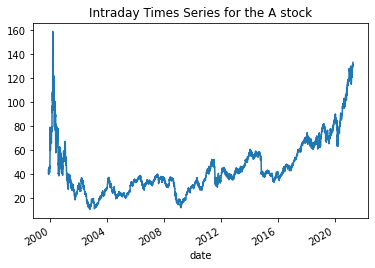

In [40]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_daily_adjusted(symbol=my_symbol, outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the {} stock'.format(my_symbol))
plt.show()

In [31]:
data

,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount,8. split coefficient
date,,,,,,,,
2021-04-15,132.00,133.940,132.0000,133.28,133.280000,2115571.0,0.0,1.0
2021-04-14,133.10,133.225,130.9610,131.97,131.970000,1499287.0,0.0,1.0
2021-04-13,131.60,133.267,131.4700,132.97,132.970000,1593774.0,0.0,1.0
2021-04-12,131.44,132.180,130.8400,131.27,131.270000,1166306.0,0.0,1.0
2021-04-09,131.46,131.920,130.7343,131.91,131.910000,1552194.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1999-11-24,40.13,41.940,40.0000,41.06,27.161863,3464400.0,0.0,1.0
1999-11-23,42.50,43.630,40.2500,40.25,26.626035,4274400.0,0.0,1.0
1999-11-22,41.31,44.000,40.0600,44.00,29.106721,4705200.0,0.0,1.0


## download time series

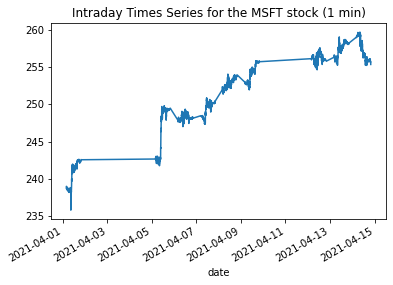

In [7]:
ts = TimeSeries(key=api_key, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='MSFT',interval='1min', outputsize='full')
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

In [9]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'MSFT',
 '3. Last Refreshed': '2021-04-14 19:50:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [11]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-04-14 19:50:00,255.38,255.38,255.38,255.38,1075.0
2021-04-14 19:49:00,255.65,255.65,255.41,255.41,1520.0
2021-04-14 19:48:00,255.65,255.65,255.65,255.65,299.0
2021-04-14 19:38:00,255.80,255.80,255.80,255.80,100.0
2021-04-14 19:28:00,255.65,255.65,255.65,255.65,105.0
